##Authors:

###Lloyd Linton Jones
###Ihona Maria Correa de Cabo

# MediGAN: A Python Library of Pretrained Generative Models for Enriched Data Access in Medical Imaging

MediGAN provides user-friendly medical image synthesis and allows users to choose from a range of pretrained generative models to generate synthetic datasets. These synthetic datasets can be used to train or adapt AI models that perform clinical tasks such as lesion classification, segmentation or detection. More info regarding the package [here](https://medigan.readthedocs.io/en/latest/index.html) and the paper [here](https://www.spiedigitallibrary.org/journals/journal-of-medical-imaging/volume-10/issue-06/061403/medigan--a-Python-library-of-pretrained-generative-models-for/10.1117/1.JMI.10.6.061403.full)


**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Add sufficient comments and explanations wherever necessary.
* This lab must be worked in pairs. Make sure that when you submit your lab you change the name to: **10_lab_Student1FullName_Student2FullName.ipynb**

---

Install medigan

In [ ]:
!pip install medigan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.9/375.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 35.7 MB/s eta 0:00:00
  Created wheel for medigan: filename=medigan-1.0.0-py3-none-any.whl size=58265 sha256=dc6e4e78c0ca20b0ac747b5b938e0621345258df64067c7678fe4e688bf69931
  Stored in directory: /root/.cache/pip/wheels/40/db/d6/78c736ec5a682197ecc17266e95d2f8016be60fcb9ee57bb87
Successfully built medigan


## 1. (0.5 point) Search for models: The current version of Medigan has 23 models available.

To explore the contents of the package, do the following:

*   Print the number of models available and the name list by initializing a generator using the function **list_models**
*   Search for the models using keywords. This can be achieved using **find_matching_models_by_values** function. Try looking for the combination of keywords: 'DCGAN', 'Mammography' and 'BCDR' ; print the results



In [ ]:
#YOUR SOLUTION HERE
from medigan import Generators

generator = Generators()
models = generator.list_models() # we initialize the generator using the list_models function
print(f"Number of models available: {len(models)}") # Number of models

for model in models: # Print the name list of the available models
    print(model)

Number of models available: 23
00001_DCGAN_MMG_CALC_ROI
00002_DCGAN_MMG_MASS_ROI
00003_CYCLEGAN_MMG_DENSITY_FULL
00004_PIX2PIX_MMG_MASSES_W_MASKS
00005_DCGAN_MMG_MASS_ROI
00006_WGANGP_MMG_MASS_ROI
00007_INPAINT_BRAIN_MRI
00008_C-DCGAN_MMG_MASSES
00009_PGGAN_POLYP_PATCHES_W_MASKS
00010_FASTGAN_POLYP_PATCHES_W_MASKS
00011_SINGAN_POLYP_PATCHES_W_MASKS
00012_C-DCGAN_MMG_MASSES
00013_CYCLEGAN_MMG_DENSITY_OPTIMAM_MLO
00014_CYCLEGAN_MMG_DENSITY_OPTIMAM_CC
00015_CYCLEGAN_MMG_DENSITY_CSAW_MLO
00016_CYCLEGAN_MMG_DENSITY_CSAW_CC
00017_DCGAN_XRAY_LUNG_NODULES
00018_WGANGP_XRAY_LUNG_NODULES
00019_PGGAN_CHEST_XRAY
00020_PGGAN_CHEST_XRAY
00021_CYCLEGAN_BRAIN_MRI_T1_T2
00022_WGAN_CARDIAC_AGING
00023_PIX2PIXHD_BREAST_DCEMRI


In [ ]:
keywords = ['DCGAN', 'Mammography', 'BCDR'] # Specific keywords we have to look for

# Function to search for models by keyword
matching_models = generator.find_matching_models_by_values(
    values=keywords,
    target_values_operator="AND",  # Ensures all keywords must be present
    are_keys_also_matched=False,  # Searches only in the values, not keys
    is_case_sensitive=False   # The search is not sensitive to case letters
)

for model in matching_models: # Search for the models that are a match
    print(f"Model ID: {model.model_id}")
    print("Matched Entries:")
    for entry in model.matched_entries:
        print(entry)

Model ID: 00005_DCGAN_MMG_MASS_ROI
Matched Entries:
{"key": "modality", "value": "mammography", "matching_element": "mammography"}
{"key": "dataset", "value": "bcdr", "matching_element": "bcdr"}
{"key": "type", "value": "dcgan", "matching_element": "dcgan"}
{"key": "tags", "value": "mammography", "matching_element": "mammography"}


# 2. Mammography:

Let's start exploring the mammography model built with the CBIS-DDSM dataset that has as output a Breast Mass.

**About this model:** A deep convolutional generative adversarial network (DCGAN) that generates regions of interest (ROI) of mammograms containing benign and/or malignant masses

**About CBIS-DDSM dataset:**  Curated Breast Imaging Subset of DDSM is an updated and standardized version of the  Digital Database for Screening Mammography (DDSM) .  The DDSM is a database of 2,620 scanned film mammography studies. It contains normal, benign, and malignant cases with verified pathology information.

## 2.1 (1.5 points)Follow this steps in order to generate the images with this model:


*   Look for the model by keyword. Use "Mammography" and "CBIS-DDSM". Are there several models with these keywords?

*   Create a generator for the model id: 00008_C-DCGAN_MMG_MASSES that creates 5 new data points with function of Generators in medigan. Make sure to set install_dependencies as True to avoid errors.



In [ ]:
from medigan import Generators

# Initialize the Generators
generator = Generators()
keywords = ["Mammography", "CBIS-DDSM"]

# Search for models using the keywords
matching_models = generator.find_matching_models_by_values(
    values=keywords,
    target_values_operator="AND",
    are_keys_also_matched=False,
    is_case_sensitive=False
)

# Print the results to see if there are multiple matches
print(f"Number of matching models: {len(matching_models)}")
for model in matching_models:
    print(f"Model ID: {model.model_id}")


Number of matching models: 2
Model ID: 00008_C-DCGAN_MMG_MASSES
Model ID: 00012_C-DCGAN_MMG_MASSES


We can see that there two models that match the keywords "Mammography" and "CBIS-DDSM". This suggests that both are associated with mammography and the CBIS-DDSM dataset. Nevertheless, they may differ in aspects like model architecture, output type, or the specific dataset subsets.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount drive to save the results there

Mounted at /content/drive


In [ ]:
generator = Generators()

output_path = "/content/drive/My Drive/medigan_outputs/00008_C_DCGAN_MMG_MASSES/" # Set the output path where the samples will be saved

# Generate 5 samples with the specified model ID
generator.generate(
    model_id="00008_C-DCGAN_MMG_MASSES",
    num_samples=5,
    output_path=output_path,
    install_dependencies=True  # Ensures dependencies are installed
)


  0%|          | 0/1 [00:00<?, ?it/s]/content/models/00008_C-DCGAN_MMG_MASSES/__init__.py:263: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_pa

## 2.2 (2 points) Create a dataloader and plot the images.
MediGAN is set to work with pytorch in a seamless way. With the function get_as_torch_dataloader from Generators you can create a pytorch loader.

Get 5 generatred images for this dataset and plot the images with its respective label as title of the plot.

**Hint:** You can interate over dataloader to get the batch information (in this case, batch of 1). Dataloader contains a data dictionary with both the image generated (called "sample") and its "label". Consider setting the get_as_torch_dataloader parameters to *install_dependencies=True, prefetch_factor=None*.

In this case, the dataloader is used to fetch batches of synthetic data (images and labels), where each batch is a dictionary containing:

- "sample": The generated image.
- "label": The corresponding label or class for the image.

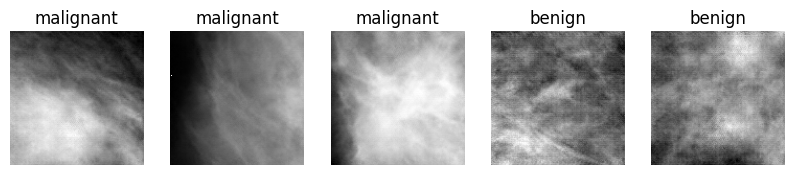

In [ ]:
import matplotlib.pyplot as plt
from medigan import Generators

# Create a PyTorch DataLoader for the 5 generated samples
dataloader = generator.get_as_torch_dataloader(
    model_id="00008_C-DCGAN_MMG_MASSES",
    num_samples=5,
    install_dependencies=True,
    prefetch_factor=None
)

# Plot the generated images with their labels
plt.figure(figsize=(10, 10))
for i, data in enumerate(dataloader):
    if i == 5:  #Ensure to display only 5 images
        break
    image, label = data["sample"], data["label"]

    # Ensure the image is compatible for plotting by converting it to numpy array
    image = image.squeeze().numpy()  # Squeeze removes the dimension with size 1 from the tensor,
                                     # leaving a shape of (height, weight), which will now be compatible with plt.imshow()

    # Plot each image
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"{label[0]}") # Set the label as the title of the plot
    plt.axis("off")

plt.show()


## 2.3 (1 point) Theoretical questions:

**A) Are these additional synthetic images something that should only be used in the training set? Why/Why not?**

Synthetic images generated by generative models are in general best suited for use in the training set rather than the validation or tests sets. If we include more synthetic data in the training set, we are providing more examples for the model to learn from and this helps it to generalize better. Since the model learns to recognize a wider variety of examples, this might improve the robustness and performance on real-world data.

On the other hand, the purpose of the validation and test sets is to evaluate the model’s performance on data that resembles real-world cases. Synthetic data, unfortunatelly, doesn’t fully capture the complexity and variety of real data and may introduce biases if included.

In conclusion, using only real images in validation and testing helps ensure that the performance metrics accurately reflect the model’s ability to generalize to new, real-world data rather than synthetic data.



**B) Give an example where this generated dataset might be useful. What is the greatest advantage of adding synthetic data?**

In this context, the generated synthetic mammogram images can be useful to train machine learning models for cancer detection, for example. Since the access to a large dataset of real mammograms can sometimes be limited in healthcare, a synthetic dataset could address this challenge by generating images that include both benign and malignant classes, so that researches can create a balanced dataset.
As mentioned before, adding synthetic data to the training can augment the set and make the model learn from a broader set of examples, thus making it generalize better. Also, you save a lot of time and money because you don't have to collect and label real medical data.  

# 3. Chest X-ray

**Model 00019_PGGAN_CHEST_XRAY:** An unconditional Progressively-growing generative adversarial network (PGGAN) that generates chest xray (CXR) images with pixel dimensions 1024x1024. The PGGAN was trained on CXR images from the ChestX-ray14 Dataset (Wang et al., 2017, Paper: https://arxiv.org/pdf/1705.02315.pdf, Data: https://nihcc.app.box.com/v/ChestXray-NIHCC). The uploaded ZIP file contains the files model.pt (model weight), init.py (image generation method and utils), a requirements.txt, a LICENSE file, the MEDIGAN metadata.json file, the used GAN training config file, a test.sh file to run the model, and an /image folder with a few generated example images.


**Dataset ChestX-ray14:** It is a popular dataset for tasks related to diagnosing and classifying various thoracic diseases based on X-ray images. It has 14 different classes/diseases


## 3.1 (1.5 points) Generate and plot 3 images with this model.


In [ ]:
#YOUR SOLUTION HERE
import matplotlib.pyplot as plt
from medigan import Generators

# Initialize the Generators
generator = Generators()
keywords = ["chest", "xray", "pggan"]

# Search for models using the keywords
matching_models = generator.find_matching_models_by_values(
    values=keywords,
    target_values_operator="AND",
    are_keys_also_matched=False,
    is_case_sensitive=False
)

# Print the results to see if there are multiple matches
print(f"Number of matching models: {len(matching_models)}")
for model in matching_models:
    print(f"Model ID: {model.model_id}")

Number of matching models: 2
Model ID: 00019_PGGAN_CHEST_XRAY
Model ID: 00020_PGGAN_CHEST_XRAY


  0%|          | 0/1 [00:00<?, ?it/s]/content/models/00019_PGGAN_CHEST_XRAY/__init__.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(mo

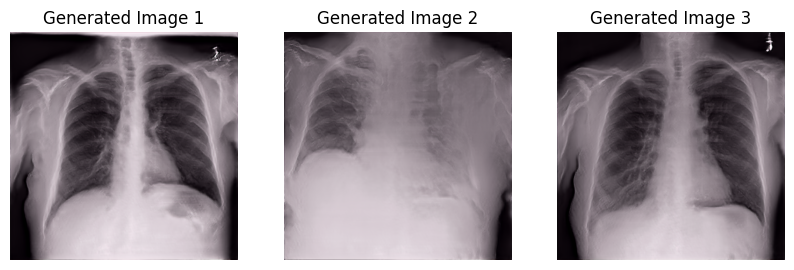

In [ ]:
generator = Generators()

output_path = "/content/drive/My Drive/medigan_outputs/00019_PGGAN_CHEST_XRAY/" # Set the output path where the samples will be saved

# Generate 5 samples with the specified model ID
generator.generate(
    model_id="00019_PGGAN_CHEST_XRAY",
    num_samples=5,
    output_path=output_path,
    install_dependencies=True  # Ensures dependencies are installed
)


# Create a PyTorch DataLoader for the 3 generated samples
dataloader = generator.get_as_torch_dataloader(
    model_id="00019_PGGAN_CHEST_XRAY",
    num_samples=3,
    install_dependencies=True,
    prefetch_factor=None
)

# Plot the generated images
plt.figure(figsize=(10, 10))
for i, data in enumerate(dataloader):
    if i == 3:
        break
    image = data["sample"] # Get the image data, 'label' key might not exist

    # Ensure the image is compatible for plotting
    image = image.squeeze().numpy()

    # Plot each image
    plt.subplot(1, 3, i + 1)
    plt.imshow(image, cmap="gray")
    # Instead of using label which might not exist, consider a generic title
    plt.title(f"Generated Image {i + 1}")
    plt.axis("off")


plt.show()

# 4. PGGAN Model for Patch Generation of Polyps with Corresponding Segmentation Masks (Trained on HyperKvasir)

**About the model:**  Progressively-growing generative adversarial network that generates a 4 dimensional output containing an RGB image (channels 1-3) and a segmentation mask (channel 4). The RGB images are images of polyps and the segmentation mask indicates the location and shape of the polyp on the image. Pixel dimensions are 256x256. The model was trained on gastrointestinal endoscopy imaging data from the HyperKvasir dataset by Borgli et al (2020, ‘https://www.nature.com/articles/s41597-020-00622-y’).

**About the dataset:** HpyerKvasir is an image and video dataset of the gastrointestinal tract. The data is collected during real gastro- and colonoscopy examinations in Norway and partly labeled by experienced gastrointestinal endoscopists. The dataset contains 110,079 images and 374 videos, and represents anatomical landmarks as well as pathological and normal findings.

This model concerns the segmentation of polyps from the endoscopy images. Gastric polyps are intraluminal projections of mucosal or submucosal tissue. While these lesions are typically benign, they do have the potential of containing local dysplasia and progression to invasive cancer.


## 4.1 (2 points) Generate and show 3 images with its respective mask in a grid of 3x2 images, where each row contains image generated and its respective mask.

In [ ]:
#YOUR SOLUTION HERE
import matplotlib.pyplot as plt
from medigan import Generators

# Initialize the Generators
generator = Generators()
keywords = ["hyperkvasir"]

# Search for models using the keywords
matching_models = generator.find_matching_models_by_values(
    values=keywords,
    target_values_operator="AND",
    are_keys_also_matched=False,
    is_case_sensitive=False
)

# Print the results to see if there are multiple matches
print(f"Number of matching models: {len(matching_models)}")
for model in matching_models:
    print(f"Model ID: {model.model_id}")

Number of matching models: 3
Model ID: 00009_PGGAN_POLYP_PATCHES_W_MASKS
Model ID: 00010_FASTGAN_POLYP_PATCHES_W_MASKS
Model ID: 00011_SINGAN_POLYP_PATCHES_W_MASKS


In [ ]:
generator = Generators()

output_path = "/content/drive/My Drive/medigan_outputs/00009_PGGAN_POLYP_PATCHES_W_MASKS/" # Set the output path where the samples will be saved

# Generate 3 samples with the specified model ID
generator.generate(
    model_id="00009_PGGAN_POLYP_PATCHES_W_MASKS",
    num_samples=5,
    output_path=output_path,
    install_dependencies=True  # Ensures dependencies are installed
)


# Create a PyTorch DataLoader for the 3 generated samples
dataloader = generator.get_as_torch_dataloader(
    model_id="00009_PGGAN_POLYP_PATCHES_W_MASKS",
    num_samples=3,
    install_dependencies=True,
    prefetch_factor=None
)

  0%|          | 0/1 [00:00<?, ?it/s]/content/models/00009_PGGAN_POLYP_PATCHES_W_MASKS/ProGAN-4ch/__init__.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.lo

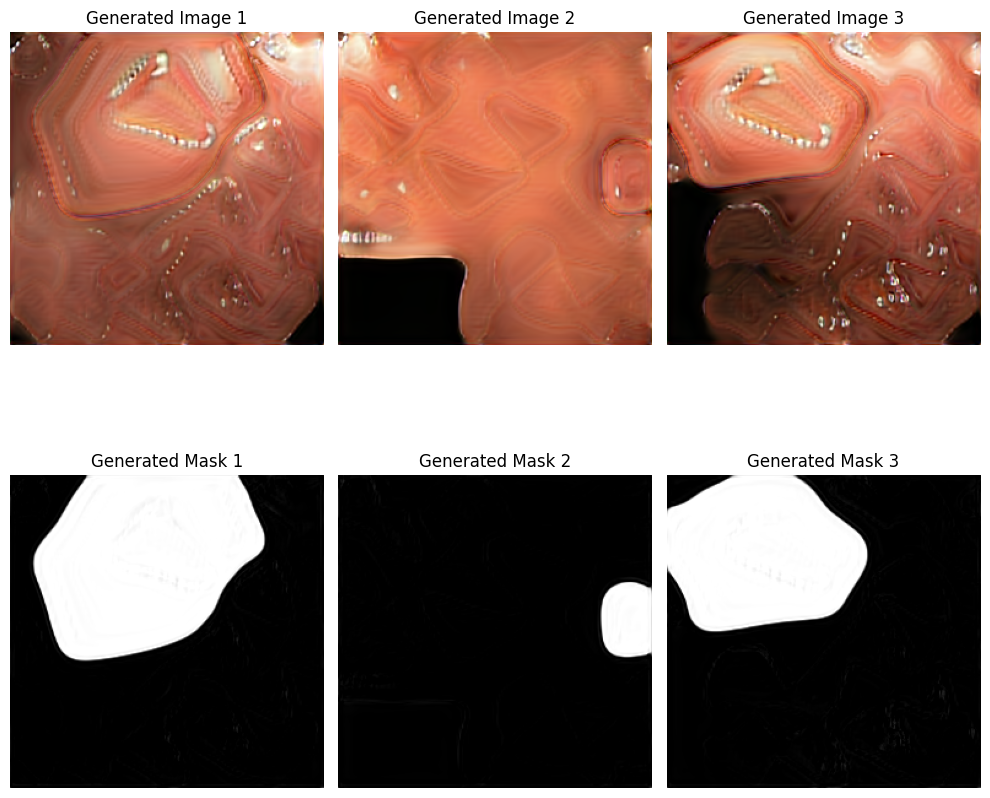

In [ ]:
# Plot the generated images
nsamples = 3
fig, ax = plt.subplots(2, nsamples, figsize=(10, 10))
for i, data in enumerate(dataloader):
    if i == nsamples:
        break
    image, mask = data["sample"], data["mask"] # Get the image and mask data

    # Ensure the image and mask is compatible for plotting
    image = image.squeeze().numpy()
    mask = mask.squeeze().numpy()

    for j in range(2):
      if j == 0:
        ax[j, i].imshow(image)
        ax[j, i].set_title(f"Generated Image {i + 1}")
        ax[j, i].axis("off")
      elif j == 1:
        ax[j, i].imshow(mask, cmap="gray")
        ax[j, i].set_title(f"Generated Mask {i + 1}")
        ax[j, i].axis("off")
plt.tight_layout()
plt.show()

# 5 (1.5 points) Theoretical questions:

**A) List 3 possible applications of MediGAN**


**Solution**



* Medical image augmentation for training AI models
* Detection and correction of imaging artifacts  
* Anonymization of patient data




**B) Model 01 of MediGAN is used for generating Mammogram Calcification Region of Interest images. Read on what the model behind this generator is and provide a brief description of it.**

**Solution**

The Model 01 of MediGAN, identified as 00001_DCGAN_MMG_CALC_ROI, is based on a Deep Convolutional Generative Adversarial Network (DCGAN).
The model is designed to generate synthetic Regions of Interest (ROIs) from mammograms, specifically depicting benign and/or malignant calcifications.The generated images have a fixed resolution of 128x128 pixels, suitable for training and evaluation in diagnostic or AI research applications. The model was trained on calcification ROI data extracted from the INbreast dataset (Moreira et al., 2012), a well-known publicly available mammographic dataset. <br>
GAN Architecture: <br>
* Generator: A convolutional neural network that learns to produce realistic mammogram ROIs.<br>
* Discriminator: Another CNN trained to distinguish real mammogram ROIs from synthetic ones. The kernel size of 6 is used in the discriminator for processing inputs.<br>

**C) What are the potential drawbacks of using generated images like the ones provided by MediGAN?**

**Solution**

Well, generated images might contain artifacts that don't appear in real medical images, and this could make the model learn features that don't correspond to true anatomical/pathological structures.
Also, generative models can struggle to capture the full variability and complexity found in real medical images. These limitations can lead to models that perform well on synthetic data but struggle with real clinical data. Therefore, there is a risk of misclassification and diagnostic errors.
On the other hand, generated medical images face a lot of challenges regarding clinical validation and acceptance.
In general, for clinical applications, we believe it's recommended to use these images cautiously, supplementing real data rather than replacing it and always validating the model on real-world datasets.

**D) What is the difference between a CNN and a GAN model?**

**Solution**

A Convolutional Neural Network (CNN) is a neural network designed for analyzing structured grid-like data, such as images, using convolutional layers to extract hierarchical features for tasks like classification or segmentation. A Generative Adversarial Network (GAN), on the other hand, consists of two neural networks — a generator and a discriminator — that work in opposition; the generator creates synthetic data, while the discriminator evaluates its authenticity and realisticness to true data. GANs use CNN architectures for both networks but are specifically designed for generative tasks rather than entirely predictive ones.


---

# **End of Lab 6: MediGAN**